# Data Preprocessing
=====================

### Importing Libraries
------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import datetime

In [2]:
pd.options.mode.copy_on_write=True

### Loading the Data
---

In [3]:
data = pd.read_csv("/home/puskchan/Stock_project/data/stocks.csv")

### Exploring the data
---

Displaying the first five rows of the dataset

In [4]:
data.head()

,symbol,date,close,high,low,open,volume
0,ASIANPAINT.NS,2019-10-06 18:30:00,1658.193604,1675.302681,1651.176884,1658.001296,562559.0
1,ASIANPAINT.NS,2019-10-08 18:30:00,1704.618896,1708.992349,1658.722167,1658.722167,1777552.0
2,ASIANPAINT.NS,2019-10-09 18:30:00,1709.569092,1723.410224,1688.326859,1696.496957,1599166.0
3,ASIANPAINT.NS,2019-10-10 18:30:00,1720.766724,1731.868491,1695.583646,1718.219552,1442236.0
4,ASIANPAINT.NS,2019-10-13 18:30:00,1728.888916,1736.194039,1715.432283,1720.526627,881724.0


Getting the list of unique companies

In [5]:
data['symbol'].unique()

array(['ASIANPAINT.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'EICHERMOT.NS',
       'NESTLEIND.NS', 'GRASIM.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ITC.NS', 'LT.NS', 'M&M.NS', 'RELIANCE.NS',
       'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'WIPRO.NS',
       'APOLLOHOSP.NS', 'DRREDDY.NS', 'TITAN.NS', 'SBIN.NS',
       'SHRIRAMFIN.NS', 'BPCL.NS', 'KOTAKBANK.NS', 'INFY.NS',
       'BAJFINANCE.NS', 'ADANIENT.NS', 'SUNPHARMA.NS', 'JSWSTEEL.NS',
       'HDFCBANK.NS', 'TCS.NS', 'ICICIBANK.NS', 'POWERGRID.NS',
       'MARUTI.NS', 'INDUSINDBK.NS', 'AXISBANK.NS', 'HCLTECH.NS',
       'ONGC.NS', 'NTPC.NS', 'COALINDIA.NS', 'BHARTIARTL.NS', 'TECHM.NS',
       'LTIM.NS', 'DIVISLAB.NS', 'ADANIPORTS.NS', 'HDFCLIFE.NS',
       'SBILIFE.NS', 'ULTRACEMCO.NS', 'BAJAJ-AUTO.NS'], dtype=object)

Descriptive statistics of the dataset

In [6]:
data.describe()

,close,high,low,open,volume
count,60662.000000,60662.000000,60662.000000,60662.000000,6.066200e+04
mean,1875.339794,1898.278640,1853.219350,1876.622403,9.127945e+06
std,1986.486152,2008.611168,1964.962313,1987.825984,2.172429e+07
min,10.208359,10.779625,10.091692,10.550314,0.000000e+00
25%,511.169411,518.896776,504.564520,512.473781,1.019058e+06
50%,1200.252808,1216.057106,1185.565378,1201.815609,3.041554e+06
75%,2571.164917,2603.363437,2540.039180,2571.188967,9.095011e+06
max,13495.599609,13551.996884,13274.450195,13383.000000,6.428460e+08


Information about the features in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  60662 non-null  object 
 1   date    60662 non-null  object 
 2   close   60662 non-null  float64
 3   high    60662 non-null  float64
 4   low     60662 non-null  float64
 5   open    60662 non-null  float64
 6   volume  60662 non-null  float64
dtypes: float64(5), object(2)
memory usage: 3.2+ MB


Shape of the data

In [8]:
data.shape

(60662, 7)

Checking for missing values

In [9]:
data.isnull().sum()

symbol    0
date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

### Handeling Dates in the Datasets
---

In [10]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S")
data['date'] = data['date'].dt.date
# data.set_index(data['date'], inplace=True)


### Correlations between the features of the dataset
---

In [11]:
data[['close','high','low','open','volume']].corr()

,close,high,low,open,volume
close,1.000000,0.999900,0.999891,0.999766,-0.277589
high,0.999900,1.000000,0.999830,0.999877,-0.277449
low,0.999891,0.999830,1.000000,0.999875,-0.277883
open,0.999766,0.999877,0.999875,1.000000,-0.277725
volume,-0.277589,-0.277449,-0.277883,-0.277725,1.000000


### Visualizing Data
---

In [12]:
# Get a list of unique company symbols from the data
company = data['symbol'].unique()

Checking distribution of data

BRITANNIA.NS


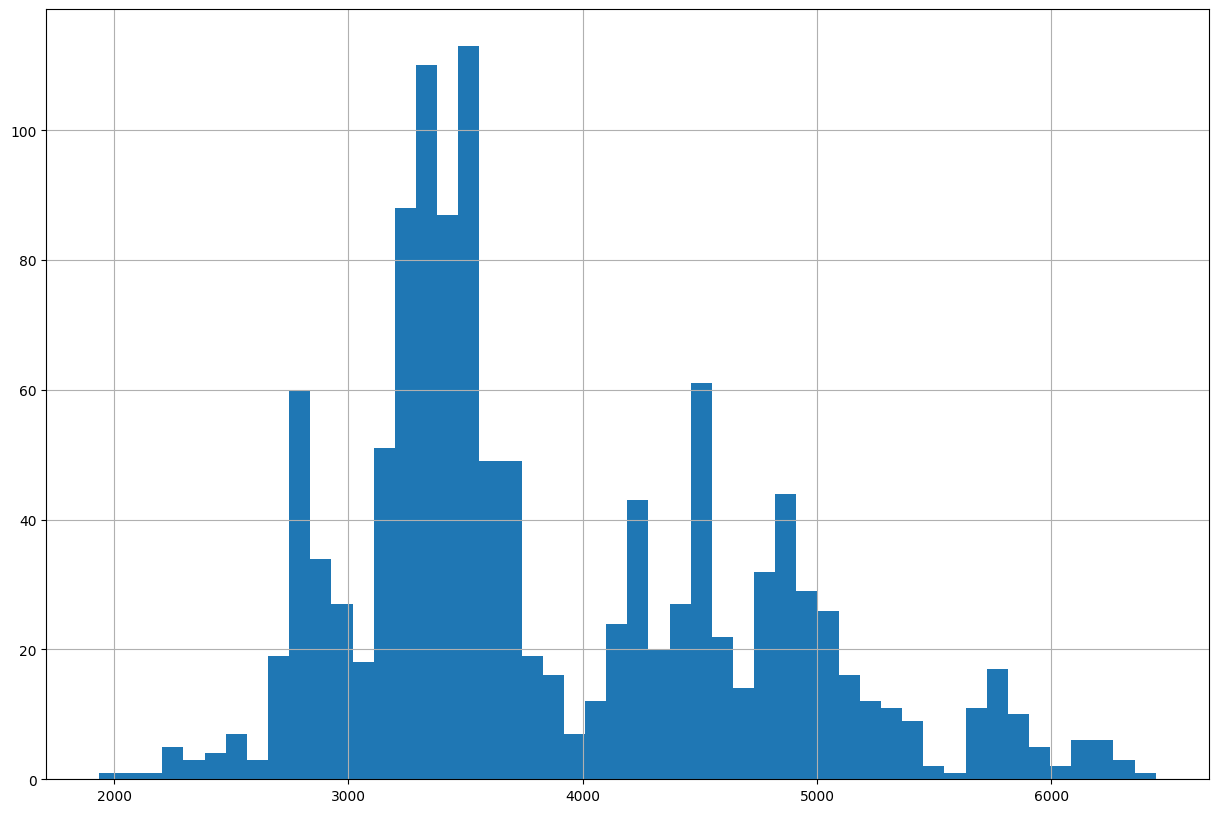

CIPLA.NS


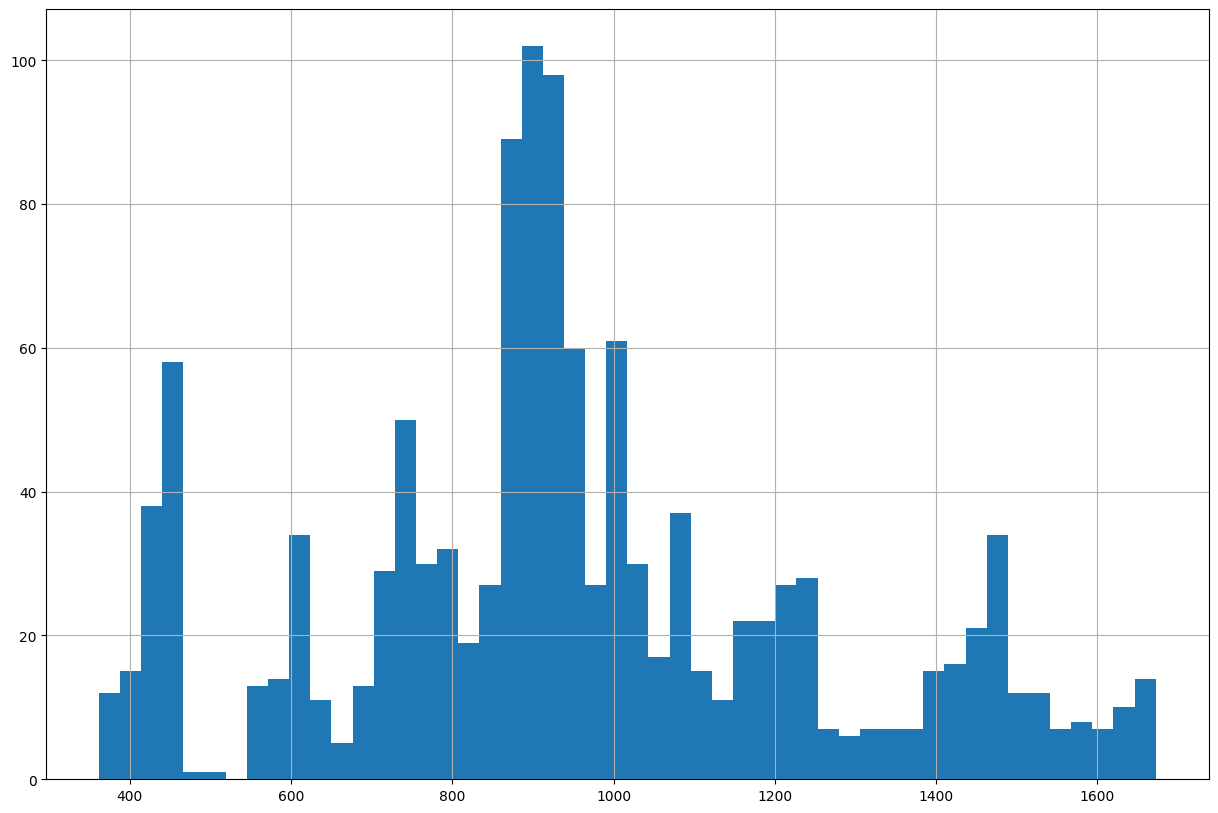

EICHERMOT.NS


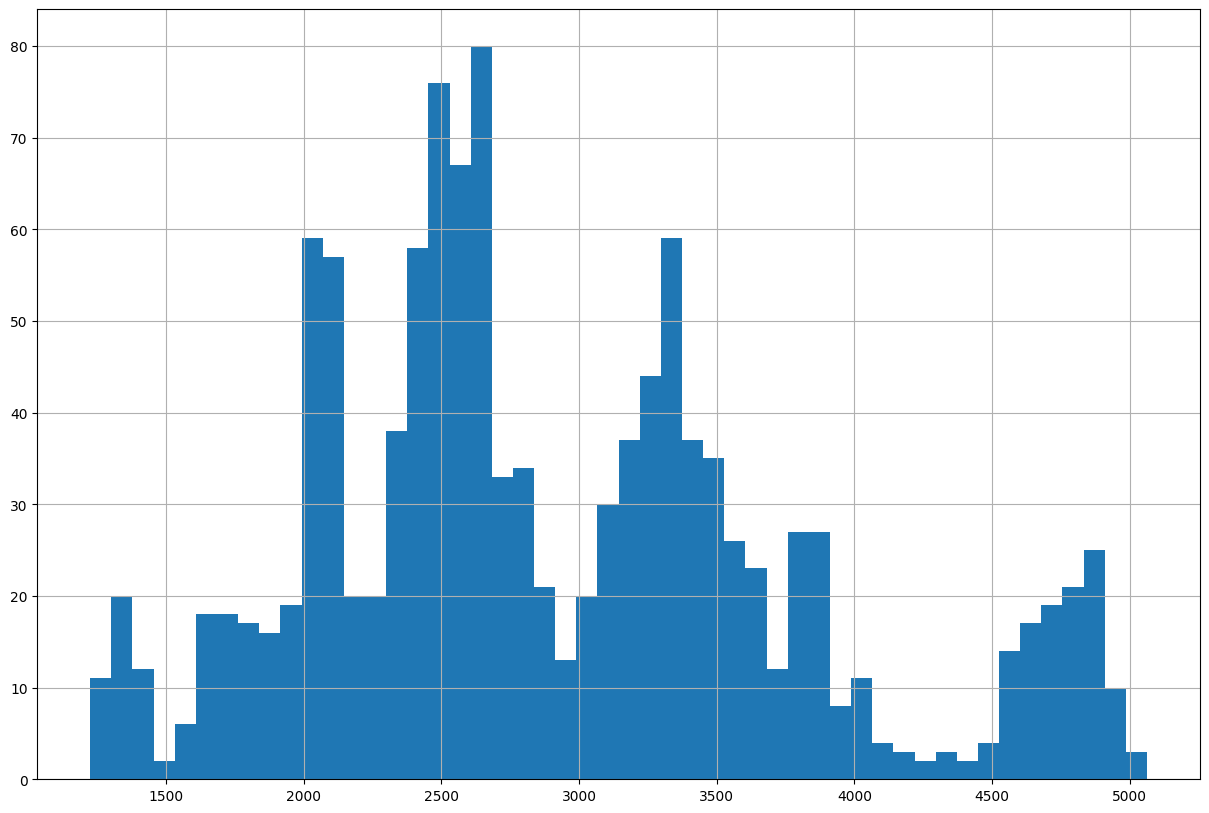

NESTLEIND.NS


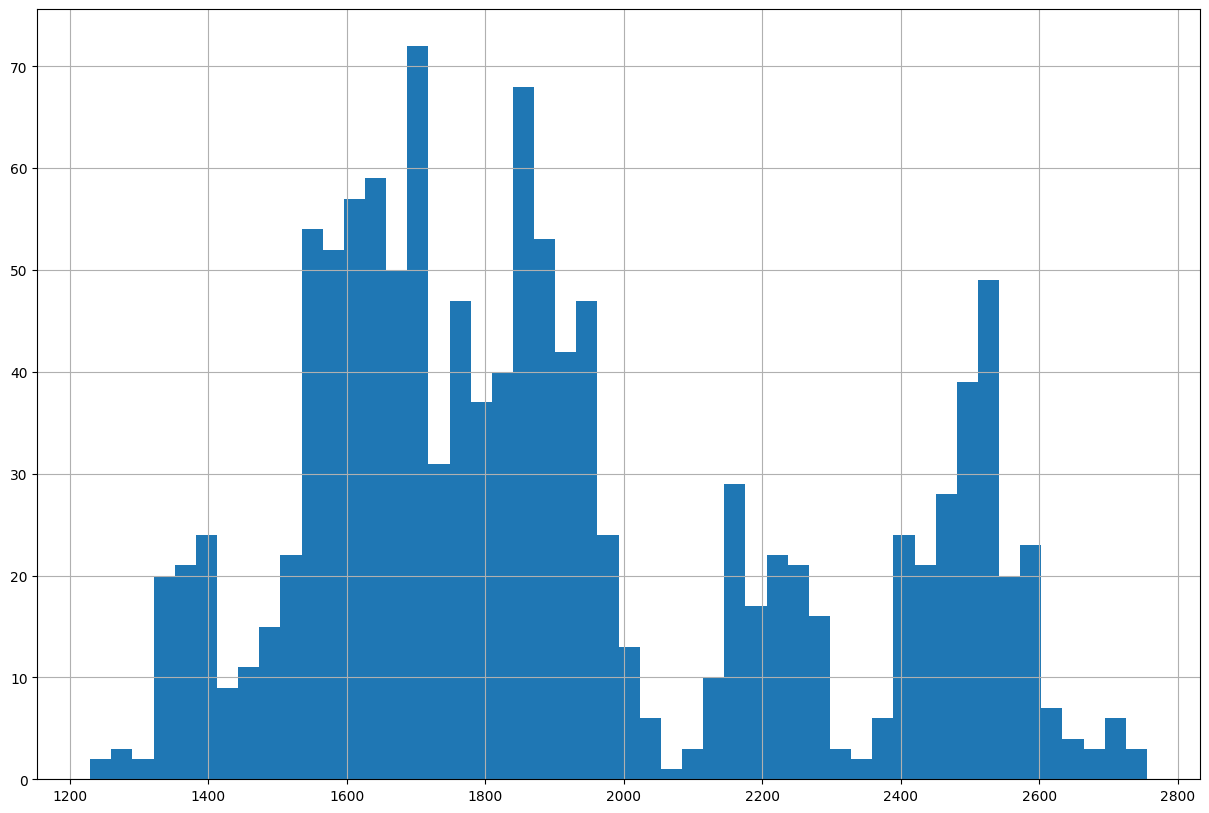

In [13]:
for i in range(1,5):
    data[data['symbol']==company[i]]['close'].hist(bins=50, figsize=(15,10))
    print('==============================================')
    print(company[i])
    print('==============================================')
    plt.show()

Plotting Close prices over time for 4 companies

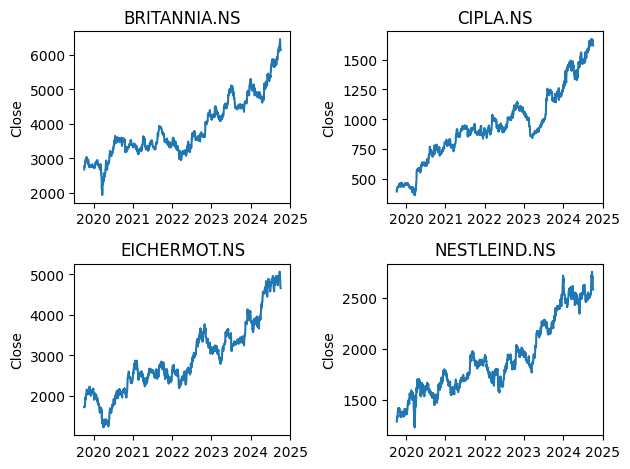

In [14]:
# Loop through each company (up to 4 companies)
for i in range(1,5):
    # Create a subplot for this company on the current figure
    plt.subplot(2,2,i)
    
    # Filter the data to only include rows where the symbol matches the current company
    cd = data[data['symbol']==company[i]]
    
    # Plot the close price over time for this company
    plt.plot(cd['date'],cd['close'])
    
    # Label the y-axis with the name 'close'
    plt.ylabel('Close')
    
    # Hide the x-axis label (by setting it to None)
    plt.xlabel(None)
    
    # Set a title for the subplot that includes the current company's symbol
    plt.title(company[i])

# Ensure subplots fit nicely in the figure
plt.tight_layout()
plt.show()


Plotting Volume over time for 4 companies.

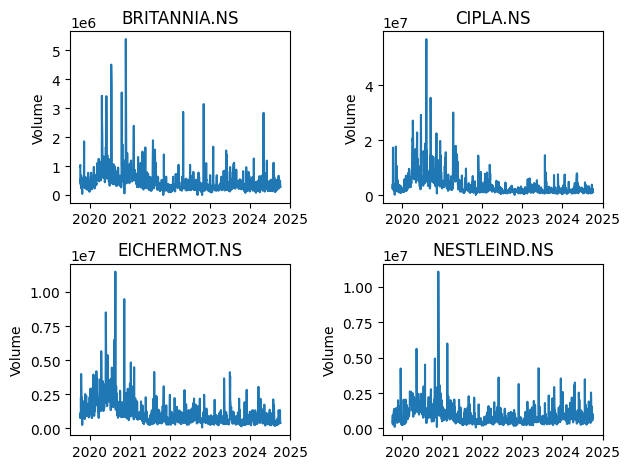

In [15]:
for i in range(1,5):
    plt.subplot(2,2,i)
    cd = data[data['symbol'] == company[i]]
    plt.plot(cd['date'],cd['volume'])
    plt.ylabel('Volume')
    plt.title(company[i])

plt.tight_layout()
plt.show()

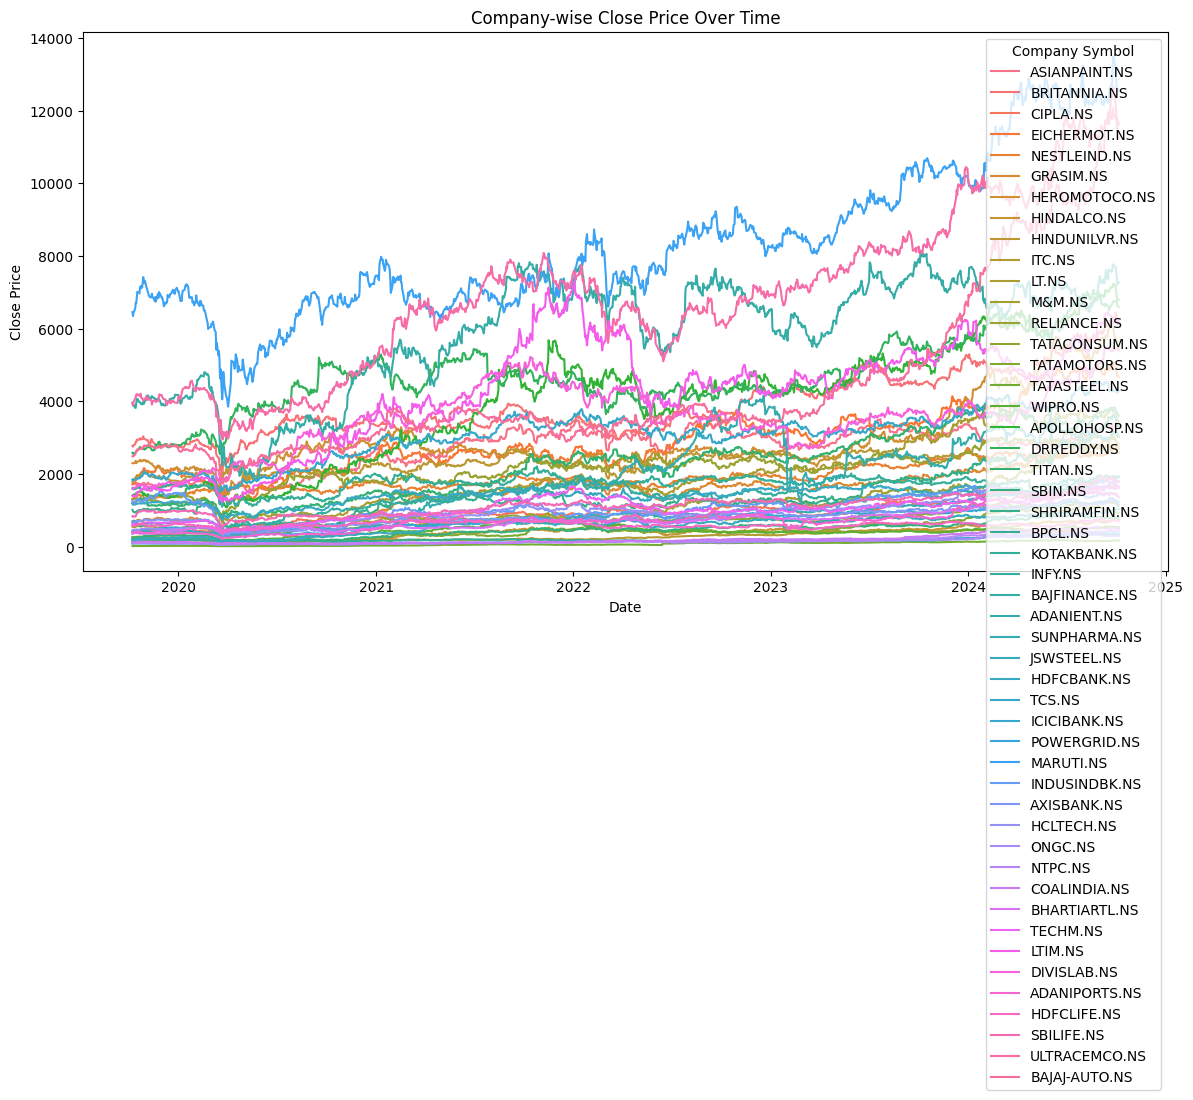

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot for close price of each company
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x="date", y="close", hue="symbol")
plt.title("Company-wise Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(title="Company Symbol")
plt.show()


Trend Over Time:

    Each line represents a company's stock closing price over time.
    You can see that most companies show an overall upward trend from 2020 to 2024, indicating general growth in the market over these years.
    The dips in early 2020 could reflect a significant market drop, likely due to the initial impact of COVID-19.

Price Ranges:

    Companies are spread across a range of closing prices. Some stocks (like the ones with lines that go above 10,000) are at high price points, while others are much lower.
    This suggests that some stocks are more expensive (like high-priced stocks, possibly due to their industry or market position), while others are lower-priced and may reflect smaller or mid-sized companies.

Volatility:

    Some lines are much smoother (stable prices over time), while others show a lot of ups and downs, which indicate higher volatility.
    For example, if a company’s line has a lot of fluctuation, its stock price might be more sensitive to market conditions or specific news.

Grouping and Separation:

    Some companies seem clustered together in the lower price range, while others stand out with much higher values.
    This grouping could indicate similar industry behavior, or it may simply reflect that some stocks are inherently lower priced.

Impact of External Factors:

    Noticeable dips or rises across all companies at the same time (e.g., early 2020) likely reflect broader market events or economic conditions, affecting most companies similarly.

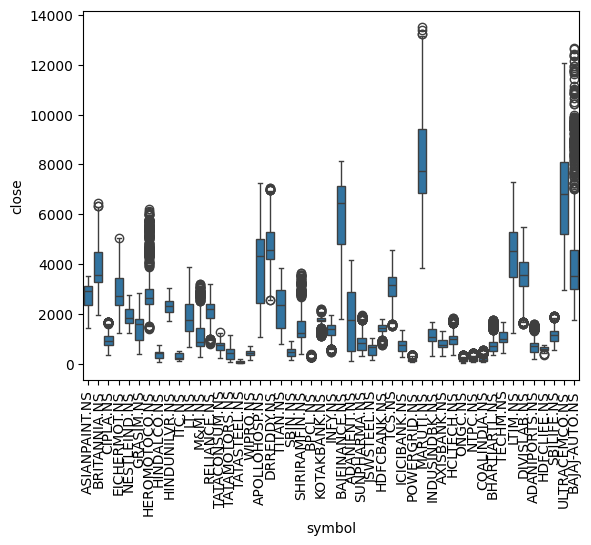

In [29]:
sns.boxplot(data=data, x="symbol", y="close")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='date', ylabel='volume'>

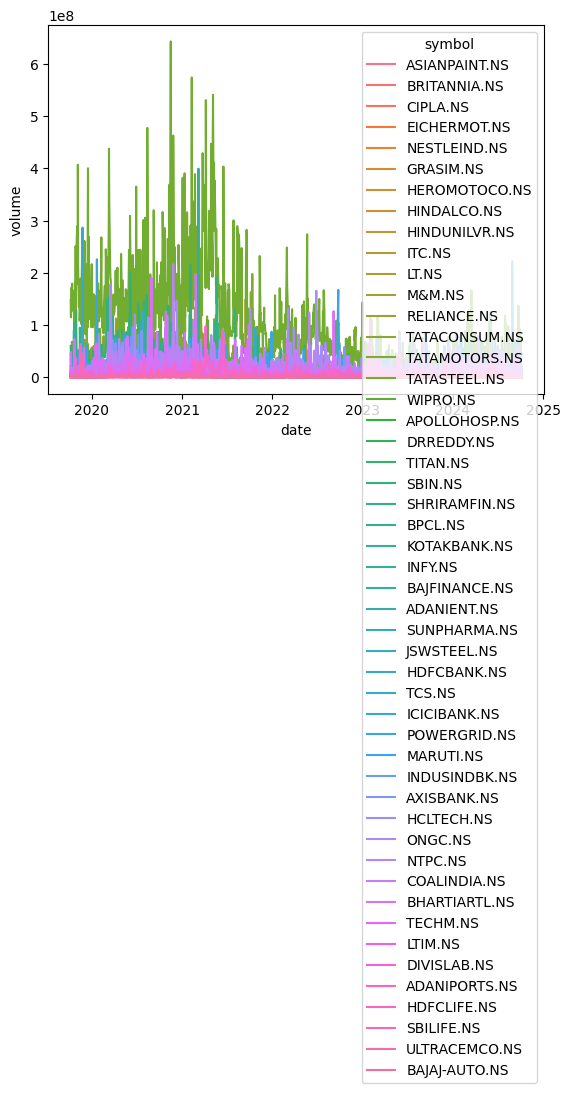

In [33]:
sns.lineplot(data=data, x="date", y="volume", hue="symbol")

<Axes: xlabel='volume', ylabel='close'>

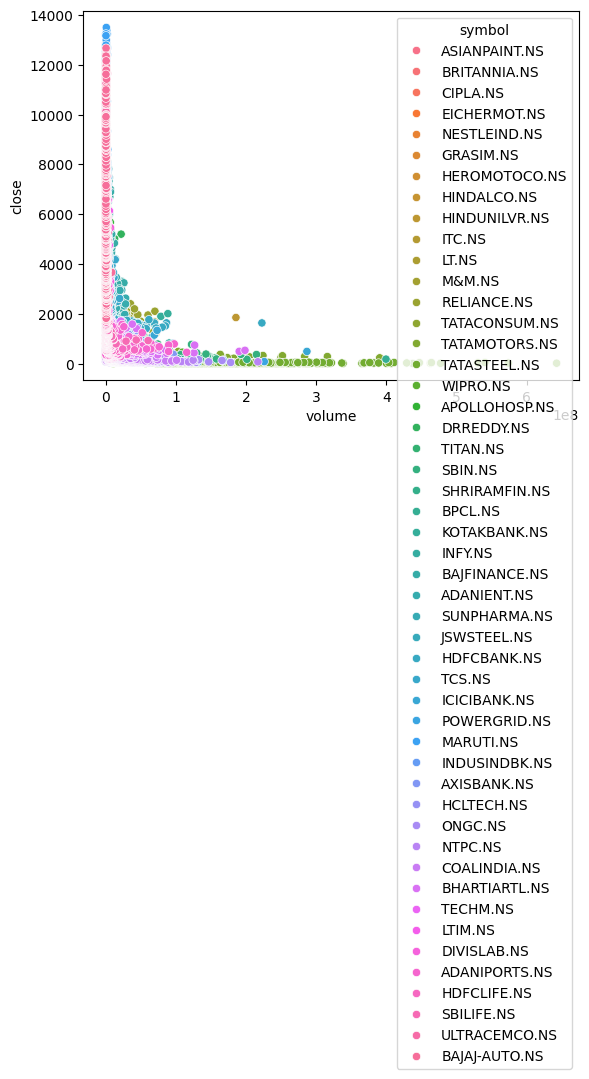

In [35]:
sns.scatterplot(data=data, x="volume", y="close", hue="symbol")

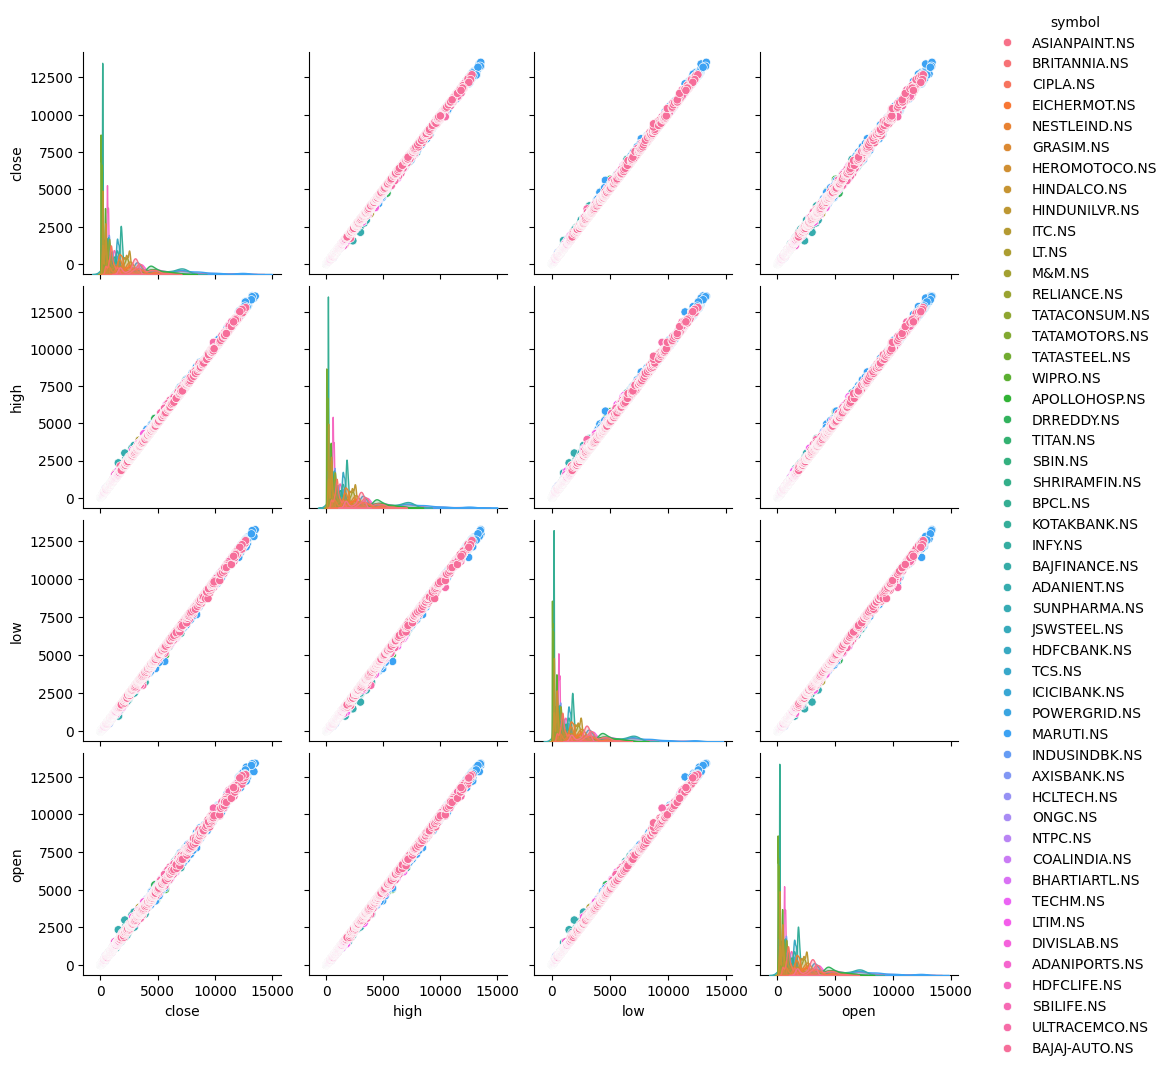

In [37]:
sns.pairplot(data=data, vars=["close", "high", "low", "open"], hue="symbol")

<Figure size 1000x600 with 0 Axes>

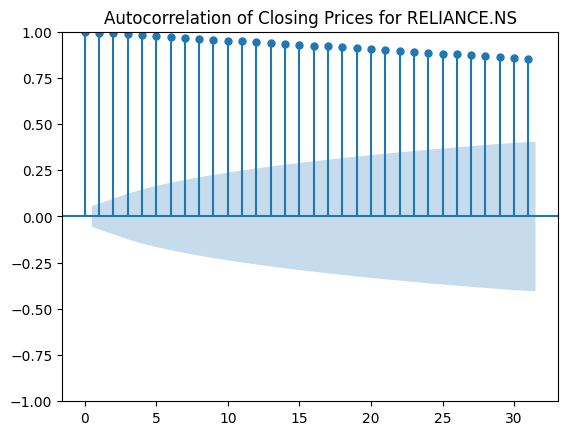

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

for symbol in data['symbol'].unique():
    company_data = data[data['symbol'] == symbol]
    plt.figure(figsize=(10, 6))
    plot_acf(company_data['close'], lags=30)
    plt.title(f"Autocorrelation of Closing Prices for {symbol}")
    plt.show()


### Fixing stationary data

Finding if the dataset is stationary or not.

In [16]:
results = []
for i in company:
    res = adfuller(data[data['symbol']==i]['close'])
    results.append("Stationary" if res[1]<0.05 else "Not Stationary")

pd.Series(results).value_counts()

Not Stationary    49
Name: count, dtype: int64

As all our data is Non Stationary, we will have to apply some transformations to the data for it to be ready for our models to be predicted.

In [17]:
cd = data[data['symbol']==company[1]]
cd['close'].diff()

1238           NaN
1239     95.172119
1240    -18.781250
1241     40.005859
1242     25.071533
           ...    
2471     69.350098
2472    107.899902
2473   -114.299805
2474   -125.750000
2475    -77.450195
Name: close, Length: 1238, dtype: float64

In [18]:
results = []
for i in company:
    cd = data[data['symbol']==i]
    cd['close_diff'] = cd['close'].diff()
    res = adfuller(cd['close_diff'].dropna())
    results.append("Stationary" if res[1]<0.05 else "Not Stationary")

pd.Series(results).value_counts()


Stationary    49
Name: count, dtype: int64

Now we will take this column back to the original dataset.

In [19]:
for i in company:
    cd = data[data['symbol']==i]
    cd['close_diff'] = cd['close'].diff()
    data.loc[data['symbol']==i,'close_diff'] = cd['close_diff']

data.head()

,symbol,date,close,high,low,open,volume,close_diff
0,ASIANPAINT.NS,2019-10-06,1658.193604,1675.302681,1651.176884,1658.001296,562559.0,NaN
1,ASIANPAINT.NS,2019-10-08,1704.618896,1708.992349,1658.722167,1658.722167,1777552.0,46.425293
2,ASIANPAINT.NS,2019-10-09,1709.569092,1723.410224,1688.326859,1696.496957,1599166.0,4.950195
3,ASIANPAINT.NS,2019-10-10,1720.766724,1731.868491,1695.583646,1718.219552,1442236.0,11.197632
4,ASIANPAINT.NS,2019-10-13,1728.888916,1736.194039,1715.432283,1720.526627,881724.0,8.122192


In [20]:
data.dropna(subset=['close_diff'], inplace=True)

In [21]:
data['close_diff'].isnull().sum()

np.int64(0)

### Calculating the moving average